# 1 - The Dataset
For implementing the project, our grupo decided to elaborate the project over a image data set of Dogs and Cats.

**1.1**
After downloading the dataset from this link:[Cat and Dogs Image Dataset](https://colab.research.google.com/drive/1-1p3qLKglMivxtkWz1TuOQvQUrWls7jo?authuser=2#scrollTo=WQRDvlIqJJId&line=2&uniqifier=1);
We uploaded 10000 images of each category to Google Drive and then used the command bellow to allow the access of my Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 2 - Treating the Image as Data

**2.1** The code bellow allow us to acess the directory that the images are locate and them print one image inverting the color from BGR to RGB, also, we import all the libraries that we will need to work with the images as data.

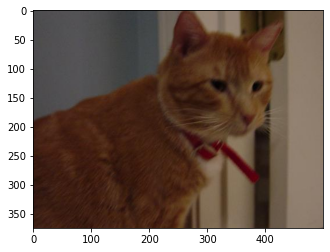

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import random
import cv2
from tqdm import tqdm

DATADIR = '/content/gdrive/My Drive/PetImages/'

CATEGORIES = ["Cat", "Dog"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_path = os.path.join(path,img) # select the image of the dog and cat
        img_array = cv2.imread((img_path))  # convert to array
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB) #convert BGR to RGB
        plt.imshow(img_array)  
        plt.show() 

        break  # we just want one for now so break
    break  #...and one more!

**2.2** We show that images have random resolution, and that would be a problem for our model to work with data that isn't normalized.

In [ ]:
print(img_array.shape)

(375, 500, 3)


**2.3** We standardize the resolution of the image, so all pictures have a resolution of 100x100.

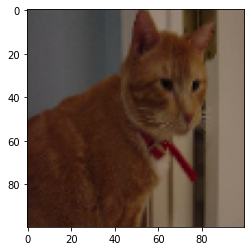

(100, 100, 3)


In [ ]:
# normalize the resolution of every image to have a 100x100 resolution
IMG_PIXELxPIXEL = 100

new_array = cv2.resize(img_array,(IMG_PIXELxPIXEL,IMG_PIXELxPIXEL))
plt.imshow(new_array)
plt.show()
print(new_array.shape)

**2.4** We define the numeric value to our labels.

In [ ]:
# set a numeric value for Cats and Dogs being 0 = cat and 1 = dog.
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    label = CATEGORIES.index(category)
    print(label)

0
1


**2.5** We do all the process that was said before. In this part we also ignore the images that feature an error upon reading them.

In [ ]:
data = []

for category in CATEGORIES:
      path = os.path.join(DATADIR,category)  # create path to dogs and cats
      label = CATEGORIES.index(category)
      for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
        try:
          img_path = os.path.join(path,img) # select the image of the dog and cat
          img_array = cv2.imread((img_path),cv2.IMREAD_GRAYSCALE)  # convert to array and put the image in a gray scale so we have a file with less "volume"
          new_array = cv2.resize(img_array,(IMG_PIXELxPIXEL,IMG_PIXELxPIXEL))
          data.append([new_array,label])
        except:
          pass
len(data)    

100%|██████████| 10000/10000 [01:03<00:00, 157.16it/s]


19963

**2.6** We mix all the Data so our model don't get used to recive only images of cats and them only images of dogs.

In [ ]:
random.shuffle(data)

In [ ]:
for sample in data[:20]:
  print(sample[1])

0
1
0
1
0
1
1
1
1
1
0
1
1
1
0
1
0
1
0
1


In [ ]:
X = []
y = []

for features,labels in data:
    X.append(features)
    y.append(labels)

X = np.array(X)

In [ ]:
#print(X)

# 3 - Exporting the Data 

**3.1** In here we use the "pickle" library to export our data to a local computer, so we're able to use the data without the need to run this program again and again every time we need to test our model.

In [ ]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
from google.colab import files
files.download('X.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('y.pickle')

FileNotFoundError: ignored